In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

In [5]:
X = X.reset_index()

In [6]:
# replace M, F and I with numerical values
sex_list = []


for index, row in X.iterrows():
    sex = row['Sex']
    if sex == 'M':
        sex_list.append(2)
    elif sex == 'F':
        sex_list.append(1)
    elif sex == 'I':
        sex_list.append(0.5)

In [7]:
# remove the male female classification
X = X.drop('Sex', axis='columns')

In [8]:
# add numerical values of sex
X = X.assign(Sex=sex_list)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.8,
    random_state=12,
)

# Cross Validation

Cross validation is the process of selecting internal batches within the entire dataset, selecting one batch and using it is a validation set. This helps prevent overfitting, making sure the model picks the correct trends.

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
mse = cross_val_score(
    model, X_train, y_train,
    scoring='neg_mean_squared_error',
    cv=10,
)

In [48]:
rmse = np.sqrt(np.abs(mse))

In [49]:
np.mean(rmse)

2.20281388490066

In [50]:
y_pred = model.predict(X_test)

In [51]:
import seaborn as sns

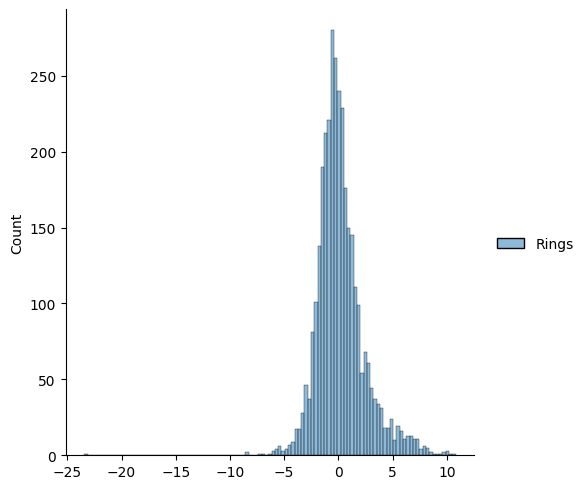

In [52]:
sns.displot(y_test - y_pred)

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test, y_pred)

0.5089685114567538